# Customer Segmentation Analysis

In [55]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [56]:
df=pd.read_csv('ifood_df.csv')
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [40]:
df.tail(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0
2204,52869.0,1,1,40,84,3,61,2,1,21,...,0,0,0,0,0,0,1,151,130,0


# Data Overview

In [41]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [42]:
# Display summary statistics
print(df.describe())


              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000 

# Data Cleaning

In [43]:
df.isnull().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [44]:
#Assessing unique values
df.nunique()

,0
Income,1963
Kidhome,3
Teenhome,3
Recency,100
MntWines,775
MntFruits,158
MntMeatProducts,551
MntFishProducts,182
MntSweetProducts,176
MntGoldProds,212


In [45]:
for column in df:
    print(f'Number of unique values in {column}:', df[column].nunique())

Number of unique values in Income: 1963
Number of unique values in Kidhome: 3
Number of unique values in Teenhome: 3
Number of unique values in Recency: 100
Number of unique values in MntWines: 775
Number of unique values in MntFruits: 158
Number of unique values in MntMeatProducts: 551
Number of unique values in MntFishProducts: 182
Number of unique values in MntSweetProducts: 176
Number of unique values in MntGoldProds: 212
Number of unique values in NumDealsPurchases: 15
Number of unique values in NumWebPurchases: 15
Number of unique values in NumCatalogPurchases: 13
Number of unique values in NumStorePurchases: 14
Number of unique values in NumWebVisitsMonth: 16
Number of unique values in AcceptedCmp3: 2
Number of unique values in AcceptedCmp4: 2
Number of unique values in AcceptedCmp5: 2
Number of unique values in AcceptedCmp1: 2
Number of unique values in AcceptedCmp2: 2
Number of unique values in Complain: 2
Number of unique values in Z_CostContact: 1
Number of unique values in 

In [57]:
#Columns Z_CostContact and Z_Revenue have all the same values.
df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)


# Data Exploration

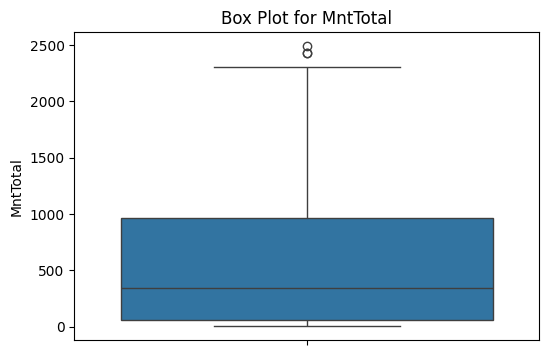

In [47]:
#Box plot for the total amount spent on all products (MntTotal)
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

In [58]:
# Identifying outliers using the IQR method for 'MntTotal'
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['MntTotal'] < (Q1 - 1.5 * IQR)) | (df['MntTotal'] > (Q3 + 1.5 * IQR))]
print(f'Number of outliers in MntTotal: {outliers.shape[0]}')

# Identifying outliers using the IQR method for 'Income'
Q1_income = df['Income'].quantile(0.25)
Q3_income = df['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

income_outliers = df[(df['Income'] < (Q1_income - 1.5 * IQR_income)) | (df['Income'] > (Q3_income + 1.5 * IQR_income))]
print(f'Number of outliers in Income: {income_outliers.shape[0]}')


Number of outliers in MntTotal: 3
Number of outliers in Income: 0


In [59]:
#Outliers
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['MntTotal'] < lower_bound) | (df['MntTotal'] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [60]:
#removing Outliers
df[(df['MntTotal'] > lower_bound) & (df['MntTotal'] < upper_bound)]
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


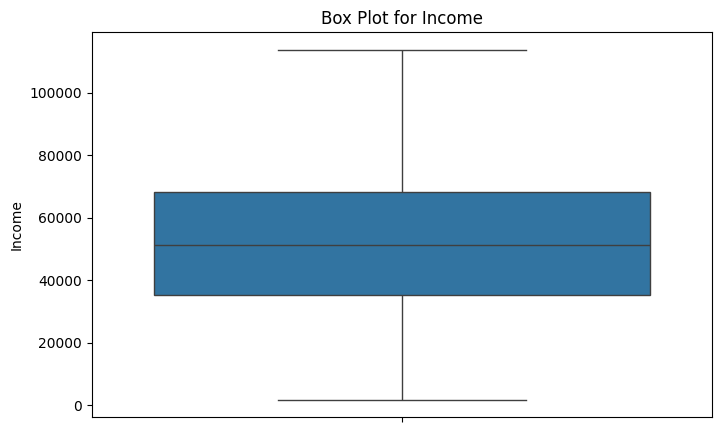

In [51]:
# Box plot for Income
plt.figure(figsize=(8, 5))
sns.boxplot(df['Income'])
plt.title('Box Plot for Income')
plt.show()

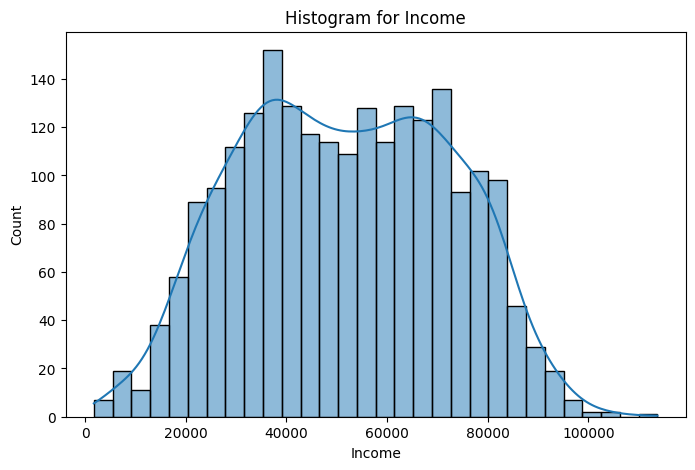

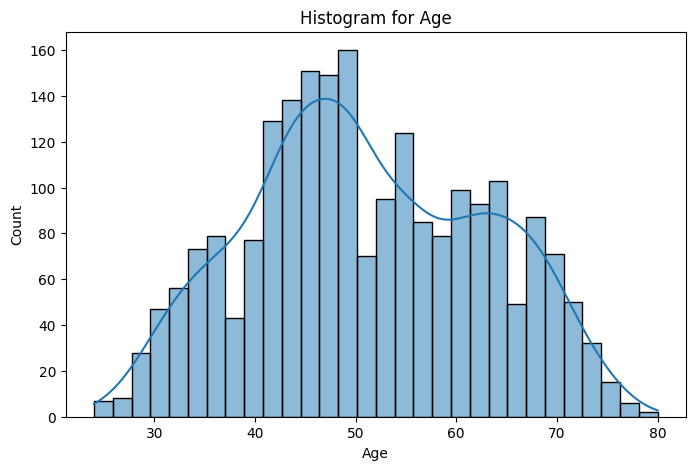

In [52]:
# Histogram for Income
plt.figure(figsize=(8, 5))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Histogram for Income')
plt.show()

# Histogram for Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Histogram for Age')
plt.show()


In [53]:
#HeatMap

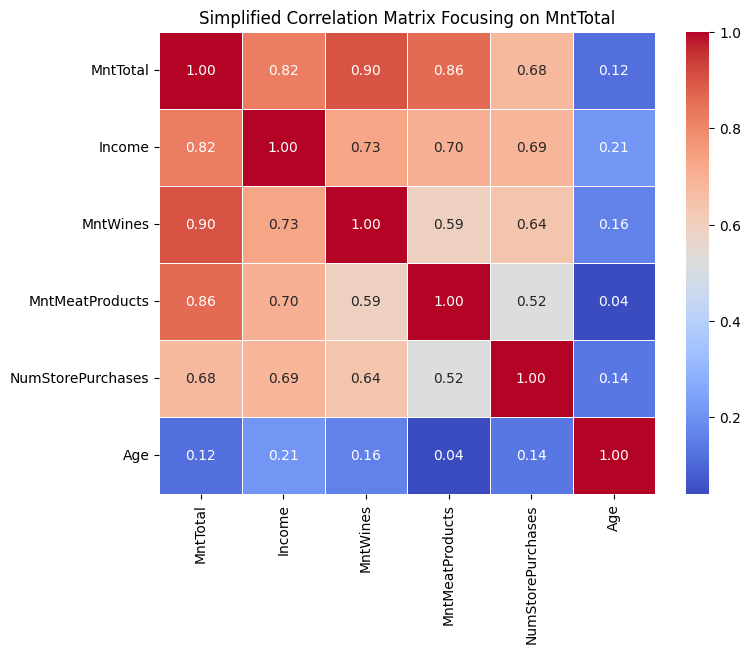

In [61]:

columns_subset = ['MntTotal', 'Income', 'MntWines', 'MntMeatProducts', 'NumStorePurchases', 'Age']

# correlation matrix
corr_matrix_subset = df[columns_subset].corr()

# Plotting the heatmap for the simplified correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_subset, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Simplified Correlation Matrix Focusing on MntTotal')
plt.show()


## K-means Clustering

In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Feature Selection for Clustering
features = df[['Income', 'NumWebPurchases', 'NumStorePurchases', 'MntTotal', 'Recency']]

# Data Preprocessing
# Handle missing values if any
features.fillna(features.mean(), inplace=True)

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))



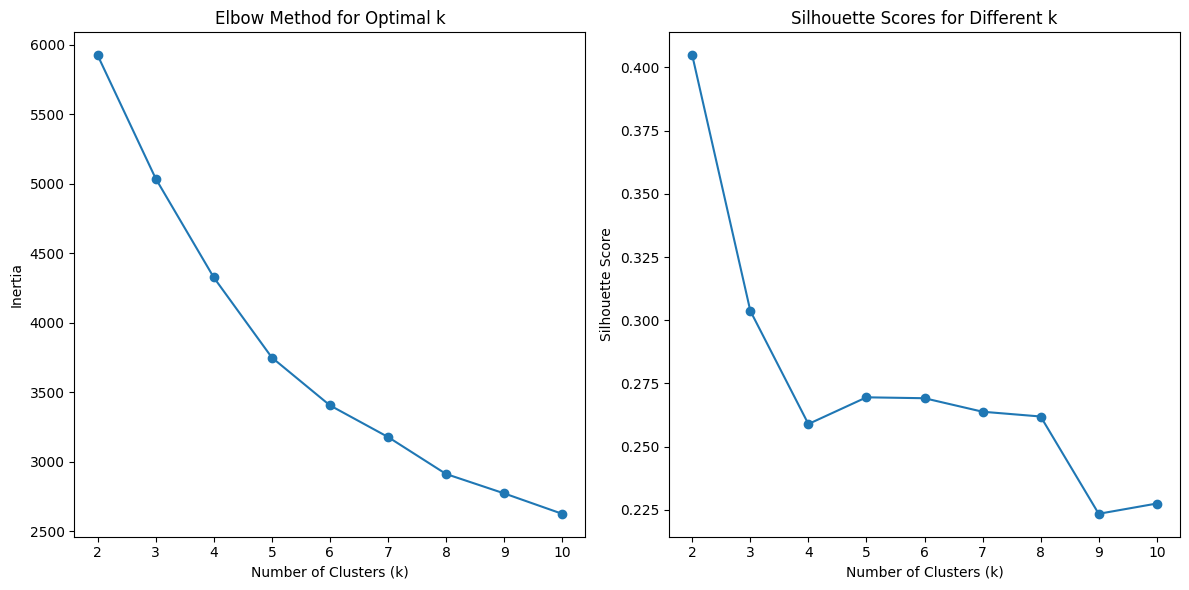

In [64]:

# Plotting the Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [69]:
#  Fit K-means with the optimal number of clusters
# Choose based on the Elbow Method or Silhouette Score
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

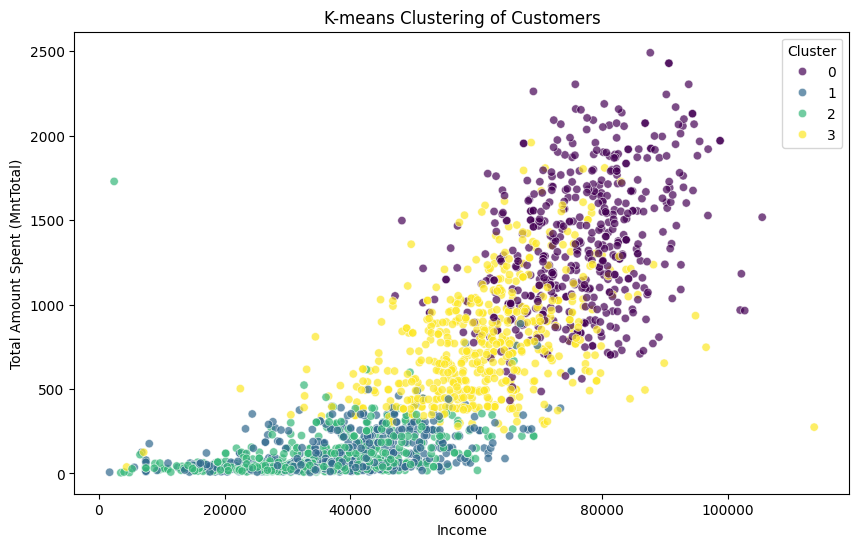

In [71]:
# Visualize the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Income'], y=df['MntTotal'], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.title('K-means Clustering of Customers')
plt.xlabel('Income')
plt.ylabel('Total Amount Spent (MntTotal)')
plt.legend(title='Cluster')
plt.show()

In [72]:
# Cluster Characteristics
cluster_summary = df.groupby('Cluster').mean()
print("Cluster Characteristics:")
print(cluster_summary)

Cluster Characteristics:
               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        76582.361829  0.051690  0.212724  49.976143  683.844930  61.007952   
1        37268.234862  0.730275  0.528440  75.966972   65.058716   6.979817   
2        34401.201022  0.739353  0.463373  25.097104   49.735945   5.836457   
3        61054.557895  0.205263  0.789474  47.005263  467.485965  35.617544   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             457.041750        89.679920         63.775348     74.343936   
1              32.955963         9.708257          7.346789     21.273394   
2              27.293015         8.741056          5.032368     18.490630   
3             176.559649        48.635088         36.457895     65.443860   

         ...  marital_Together  marit

Cluster Sizes:
Cluster
0    503
1    545
2    587
3    570
Name: count, dtype: int64


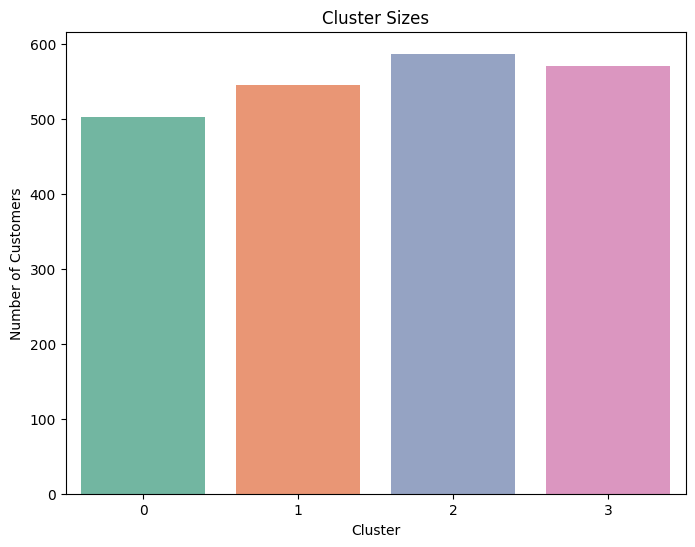

Silhouette Score for 4 clusters: 0.26


In [75]:

# Fit K-means with an optimal number of clusters (assuming optimal_k = 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Cluster Sizes
cluster_sizes = df['Cluster'].value_counts().sort_index()
print("Cluster Sizes:")
print(cluster_sizes)

# Plotting Cluster Sizes
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='Set2')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

# Silhouette Score Analysis
silhouette_avg = silhouette_score(scaled_features, df['Cluster'])
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg:.2f}')


In [76]:
# Mean Consumption of Different Product Types by Cluster
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
mean_consumption = df.groupby('Cluster')[spending_columns].mean()
print("\nMean Consumption of Different Product Types by Cluster:")
print(mean_consumption)



Mean Consumption of Different Product Types by Cluster:
           MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                            
0        683.844930  61.007952       457.041750        89.679920   
1         65.058716   6.979817        32.955963         9.708257   
2         49.735945   5.836457        27.293015         8.741056   
3        467.485965  35.617544       176.559649        48.635088   

         MntSweetProducts  MntGoldProds  
Cluster                                  
0               63.775348     74.343936  
1                7.346789     21.273394  
2                5.032368     18.490630  
3               36.457895     65.443860  


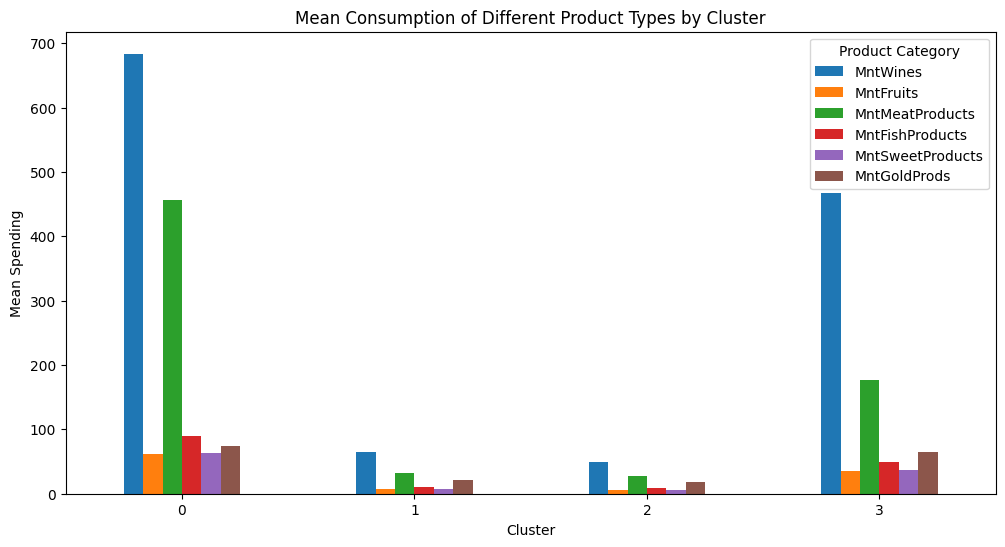

In [77]:
# Plotting Mean Consumption by Cluster
mean_consumption.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Consumption of Different Product Types by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Spending')
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.show()

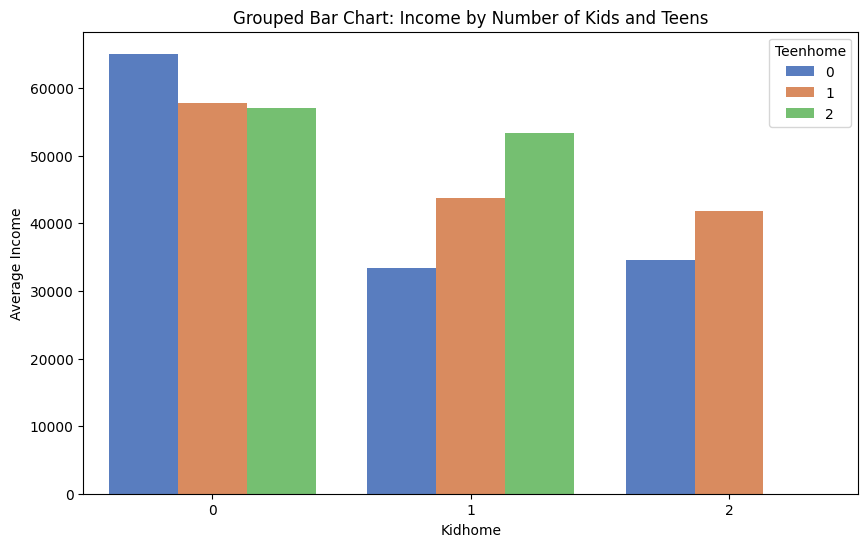

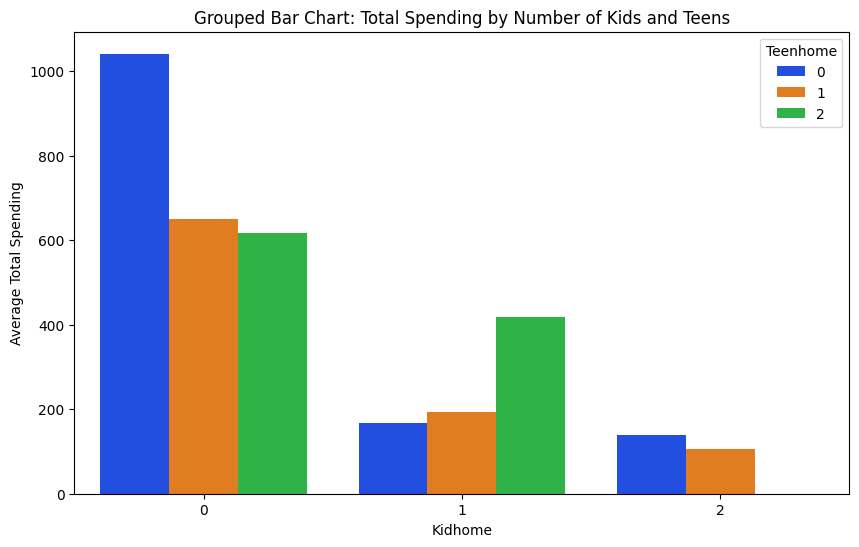

In [95]:
#  Bar Chart: Income and Spending by Household Size

# First, ensure only numeric columns are included in the mean calculation
grouped_data = df.groupby(['Kidhome', 'Teenhome']).agg({
    'Income': 'mean',
    'MntTotal': 'mean'
}).reset_index()

# Plot for Income
plt.figure(figsize=(10, 6))
sns.barplot(x='Kidhome', y='Income', hue='Teenhome', data=grouped_data, palette='muted')
plt.title('Grouped Bar Chart: Income by Number of Kids and Teens')
plt.ylabel('Average Income')
plt.legend(title='Teenhome')
plt.show()

# Plot for Total Spending
plt.figure(figsize=(10, 6))
sns.barplot(x='Kidhome', y='MntTotal', hue='Teenhome', data=grouped_data, palette='bright')
plt.title('Grouped Bar Chart: Total Spending by Number of Kids and Teens')
plt.ylabel('Average Total Spending')
plt.legend(title='Teenhome')
plt.show()


In [84]:

# Create 'marital' column based on existing columns ---
marital_status_columns = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']

# Define a function to map marital status columns into a single value
def map_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'

# Apply the function to create the 'marital' column
df['marital'] = df.apply(map_marital_status, axis=1)

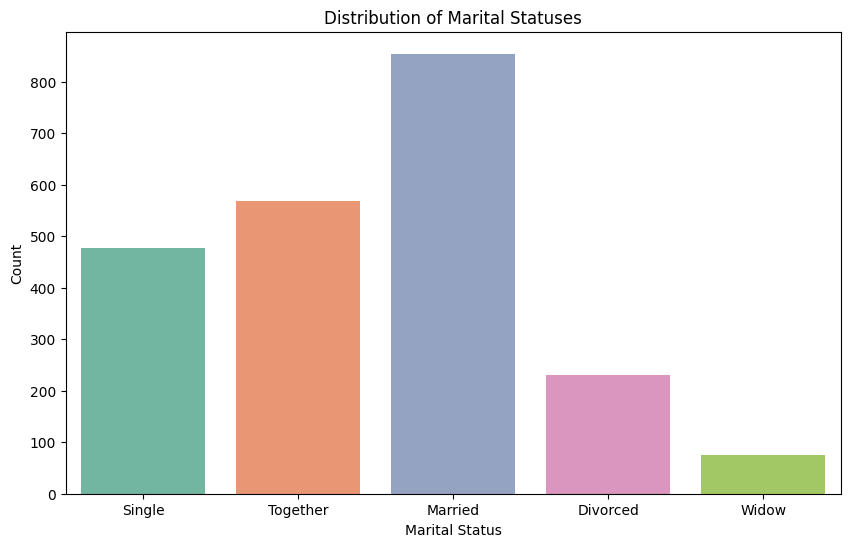

In [82]:
# Visualize the distribution of marital statuses
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', data=df, palette='Set2')
plt.title('Distribution of Marital Statuses')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

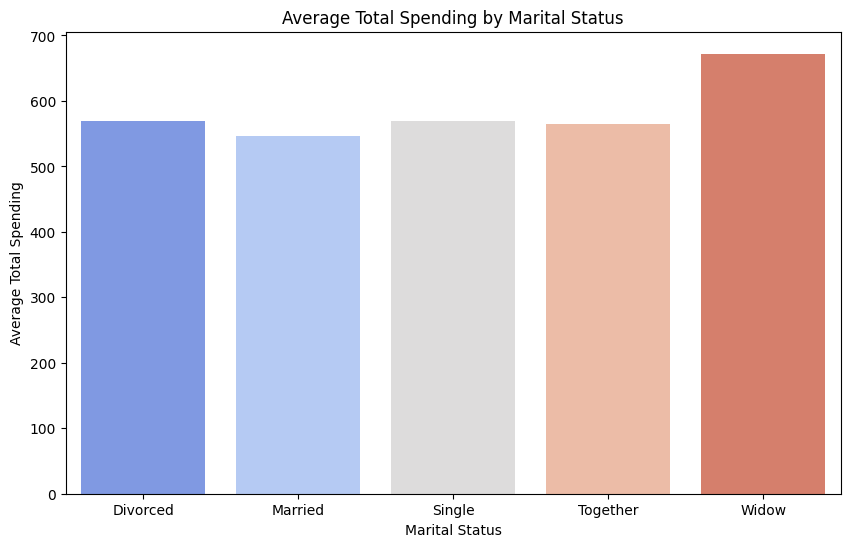

In [83]:

# Bar chart of average total spending by marital status
marital_spending = df.groupby('marital')['MntTotal'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='marital', y='MntTotal', data=marital_spending, palette='coolwarm')
plt.title('Average Total Spending by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Total Spending')
plt.show()

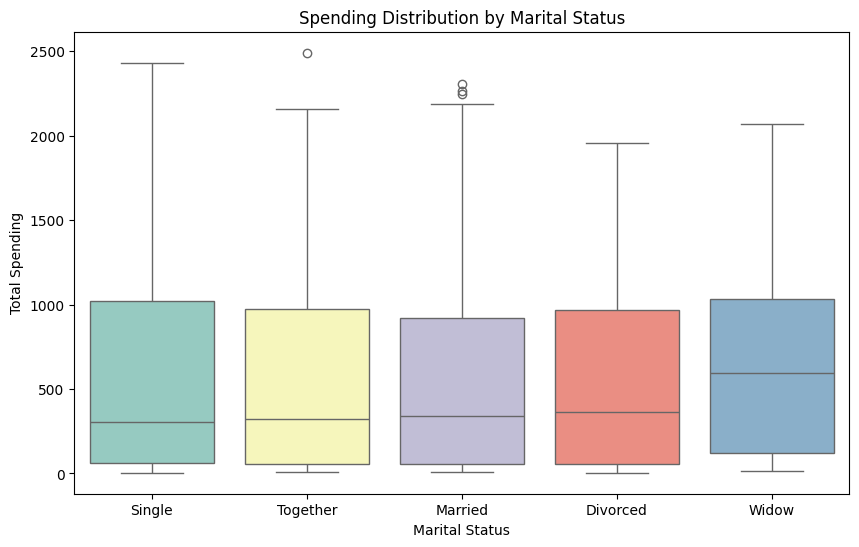

In [85]:
# Boxplot: Distribution of spending by marital status ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='marital', y='MntTotal', data=df, palette='Set3')
plt.title('Spending Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Spending')
plt.show()

# Results

This section contains the results of the K-means clustering analysis, which aimed to identify distinct customer segments based on the total amount of purchases they made (MntTotal). The analysis utilised 'Income' and 'In_relationship' features.

#Key Insights:
Spending Behavior: The average total spending (MntTotal) is 562.76, with a standard deviation of 575.94, indicating a wide range of spending habits.
Customers with high MntTotal are likely high-value customers, contributing significantly to the business revenue.

Income Distribution: The average income is 51,622, with a maximum of 113,734 and a minimum of 1,730, showing that the customer base spans various income groups. No major outliers in income.

Family Composition: Most customers have no children or teenagers in their household (median values for Kidhome and Teenhome are both 0).

Product Preferences:On average, customers spend the most on wines (MntWines), followed by meat products (MntMeatProducts).
Customers spend the least on sweet products and gold products.

Campaign Acceptance: The acceptance rate of marketing campaigns (AcceptedCmpOverall) is relatively low, with only 30% of customers having accepted any campaigns.